# Análise Exploratória dos Dados (Letícia):
Neste notebook será realiza uma análise Exploratória dos Dados para as perguntas 2, 3 e 5, as quais serão apresentadas a seguir.

In [ ]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

#dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio
dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

# Ocorreu alguma alteração na produção pecuária e agrícola do período analisado?

A pergunta, "Ocorreu alguma alteração na produção pecuária e agrícola do período analisado?", pode ser considerada redundante, uma vez que a variabilidade na produção agrícola e pecuária é inevitável ao longo de qualquer período de tempo, influenciada por uma série de fatores intrínsecos e extrínsecos, como mudanças climáticas, políticas econômicas, e oscilações nos mercados internos e externos. Portanto, essa questão não contribui com novos insights direcionados à análise dos dados, pois os resultados de variação já são implícitos pela natureza da dinâmica agrícola e pecuária.

Além disso, a segunda pergunta, "Como a pandemia de COVID-19 afetou a relação entre a produção agrícola e pecuária?", já oferece uma análise sobre esse aspecto de maneira direcionada, dando ênfase nos efeitos e impactos resultantes da pandemia. Considerando o caráter transformador desse evento global, que afetou profundamente os aspectos econômicos, sociais e políticos, é justificável que torne a primeira redundante no momento, permitindo uma compreensão detalhada dos fatores que alteraram a dinâmica da produção durante o período de 2016 a 2021.

Em vista disso, a primeira pergunta será substituída, na próxima entrega, com o objetivo de explorar novas perspectivas ou aspectos não abordados pelo grupo, buscando expandir a análise com base nos dados. A reformulação propõe investigar variáveis adicionais ou insights complementares que, até o momento, não foram plenamente considerados, proporcionando uma análise mais robusta e detalhada dos impactos econômicos, sociais e ambientais sobre a produção agropecuária.




# Como a pandemia de COVID-19 afetou a relação entre a produção agrícola e pecuária?


A pandemia de COVID-19 impactou significativamente a produção e distribuição, devido a interrupções nas cadeias produtivas, no fluxo de trabalho e nas logísticas de comercialização. Além da queda na produção, houve efeitos no mercado de trabalho e na demanda por produtos, exigindo adaptação dos produtores.

Embora os efeitos variem conforme o tipo de produto e a estrutura produtiva, o setor também encontrou oportunidades, como a digitalização e o uso de novos canais de venda. Diante disso, surge a questão: quais mudanças ocorreram na produção agrícola e pecuária durante a pandemia, e como elas afetaram a dinâmica do setor?

## 📊 Comparação da Produção Agrícola e Pecuária ao Longo dos Anos

O primeiro passo para responder aos questionamentos levantados é compreender a evolução da produção agrícola e pecuária ao longo dos anos (2016 - 2021). Para isso, é fundamental analisar a dinâmica desses setores tanto no período pré-pandemia quanto durante a mesma, a fim de identificar possíveis mudanças. Para facilitar essa análise, foi construído um gráfico comparativo entre o valor da produção agrícola e o valor da produção pecuária ao longo dos anos. A visualização permite identificar tendências de crescimento ou declínio em ambas as produções, fornecendo uma base essencial para a análise inicial dos dados.

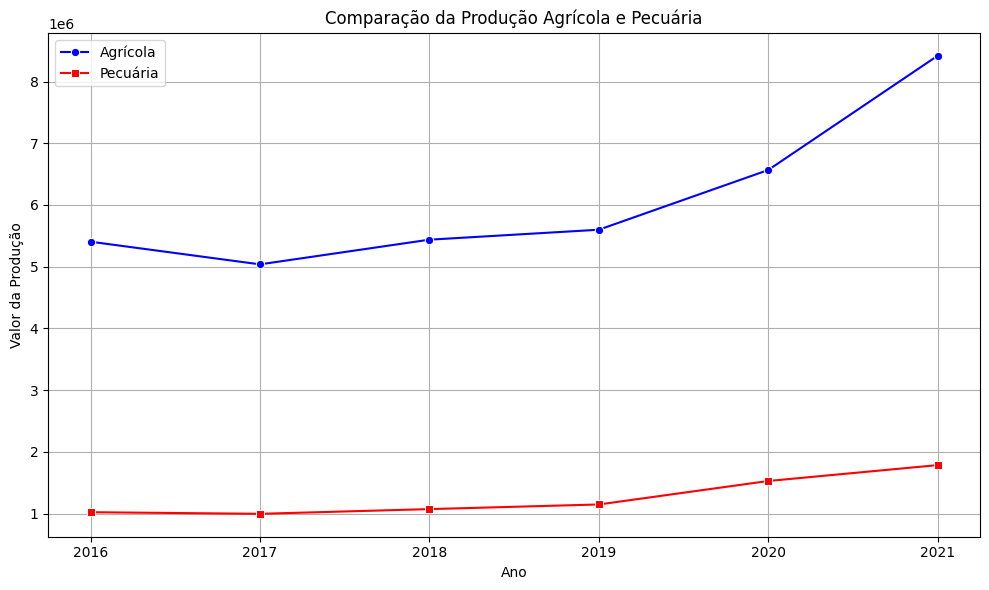

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar dados por ano
comparativo = dados.groupby('Ano')[['VlProducaoAgricola', 'VlProducaoPecuaria']].sum().reset_index()

# Plotar com paleta azul e vermelha
plt.figure(figsize=(10,6))
sns.lineplot(data=comparativo, x='Ano', y='VlProducaoAgricola', label='Agrícola', marker='o', color='blue')
sns.lineplot(data=comparativo, x='Ano', y='VlProducaoPecuaria', label='Pecuária', marker='s', color='red')
plt.title('Comparação da Produção Agrícola e Pecuária')
plt.ylabel('Valor da Produção')
plt.xlabel('Ano')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusão:
É possível observar uma queda inicial no valor da produção agrícola entre 2016 e 2017, seguida de um crescimento constante a partir de 2018, com um aumento expressivo em 2020 e 2021. Esse crescimento acelerado pode estar relacionado a mudanças no mercado interno e externo durante a pandemia de COVID-19, além de questões políticas, como o aumento da demanda por alimentos básicos e estímulos ao agronegócio. A pecuária, por sua vez, permaneceu relativamente estável até 2019, apresentando um crescimento mais acentuado a partir de 2020, o que sugere uma resposta mais tardia do setor às novas condições econômicas impostas pela pandemia.

##Área Plantada vs Produtividade Agrícola ao Longo dos Anos

Uma das dinâmicas de mercado observadas durante o período da pandemia de COVID-19 foi a variação de valor agregado a diveros produtos, inclusive isso refletou no preço de diversos produtos agrícolas [(aumento dos preços durante a pandemia)](https://g1.globo.com/sp/vale-do-paraiba-regiao/noticia/2021/10/24/preco-de-alguns-alimentos-chega-a-dobrar-apos-inicio-da-pandemia-veja-comparativo.ghtml). Para analisar essa relação, foi gerado um gráfico com a seguinte estrutura:
  * Barras para a Área Plantada: A área plantada é representada por barras verticais (na cor azul), que mostram o total de hectares plantados a cada ano.
  * Linha para a Produtividade: A produtividade é representada por uma linha vermelha, que conecta os valores da produtividade por hectare a cada ano.

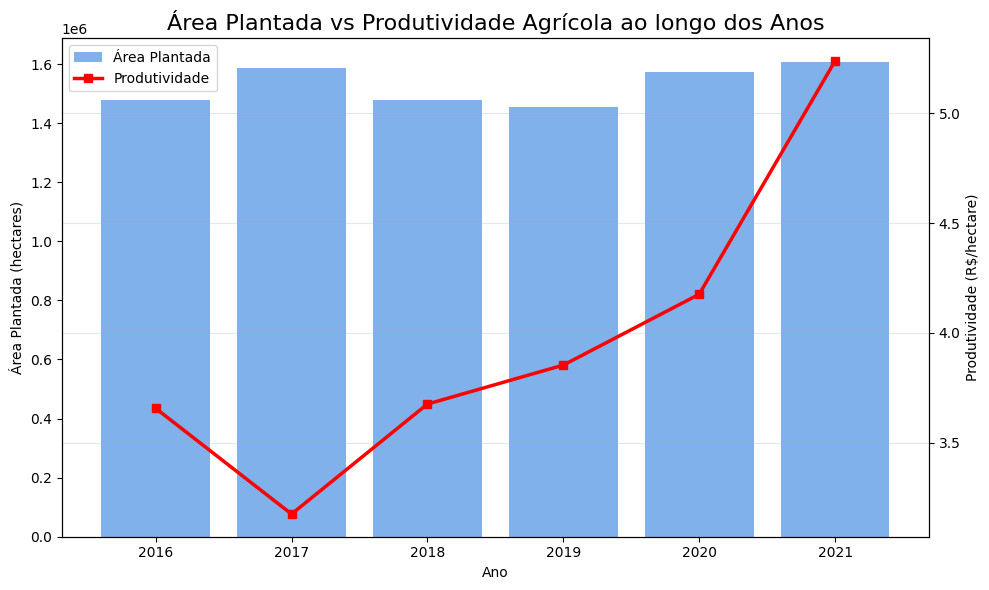

In [ ]:
# Agrupar e somar os valores por ano
df_grouped = dados.groupby('Ano').sum().reset_index()

# Calcular a produtividade (valor por hectare)
df_grouped['Produtividade_por_hectare'] = df_grouped['VlProducaoAgricola'] / df_grouped['AreaPlantada_h']

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(10,6))

# Configurar barras para área plantada (azul)
color_area = '#4A90E2'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Área Plantada (hectares)')
ax1.bar(df_grouped['Ano'], df_grouped['AreaPlantada_h'], color=color_area, alpha=0.7, label='Área Plantada')
ax1.tick_params(axis='y')

# Criar segundo eixo Y para produtividade (vermelho)
ax2 = ax1.twinx()
color_prod = 'red'
ax2.set_ylabel('Produtividade (R$/hectare)')
ax2.plot(df_grouped['Ano'], df_grouped['Produtividade_por_hectare'], color=color_prod, marker='s', linewidth=2.5, label='Produtividade')
ax2.tick_params(axis='y')

# Adicionar legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Área Plantada vs Produtividade Agrícola ao longo dos Anos', fontsize=16)
plt.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


### Conclusão:

A análise do gráfico mostra duas tendências importantes na agricultura brasileira entre 2016 e 2021:

Entre 2016 e 2017, a produtividade caiu cerca de 13,5%, apesar do aumento da área plantada. Isso reflete uma safra com maior volume, porém com queda nos preços e menor valor agregado por hectare [(Queda  nos podutos agrícolas)](https://g1.globo.com/economia/agronegocios/noticia/2018/09/13/producao-agricola-brasileira-atinge-r-3196-bilhoes-em-2017.ghtml)).

A partir de 2018, houve recuperação da produtividade, que acelerou na pandemia (2020-2021), com aumento de 24% no valor por hectare, enquanto a área plantada cresceu moderadamente. Isso indica que o aumento do valor da produção foi mais impulsionado por fatores de mercado do que pela expansão da área cultivada.

Os dados indicam que as condições econômicas da pandemia atuaram como catalisadoras do aumento do valor agregado na produção agrícola, refletido em preços mais altos ao consumidor.

## Variação Percentual da Proporção da Área Plantada por Região

Durante a pandemia, diversos setores sofreram quedas, e é importante verificar se essa tendência também foi observada no setor agropecuário. Para isso, foi desenvolvido um heatmap que visualiza a variação percentual da proporção da área plantada por região e ano. Esse gráfico permite identificar como a proporção da área plantada mudou ao longo dos anos em diferentes regiões. Através dessa visualização, é possível observar quais regiões aumentaram ou diminuíram sua área plantada de um ano para o outro, além de perceber a intensidade dessas variações.

No heatmap, foram utilizadas cores mais quentes (vermelho) para representar os aumentos na área plantada, enquanto as cores frias (azul) indicam uma diminuição. A visualização rápida dessas variações ao longo dos anos facilita a análise e oferece insights sobre o comportamento da área plantada em cada região

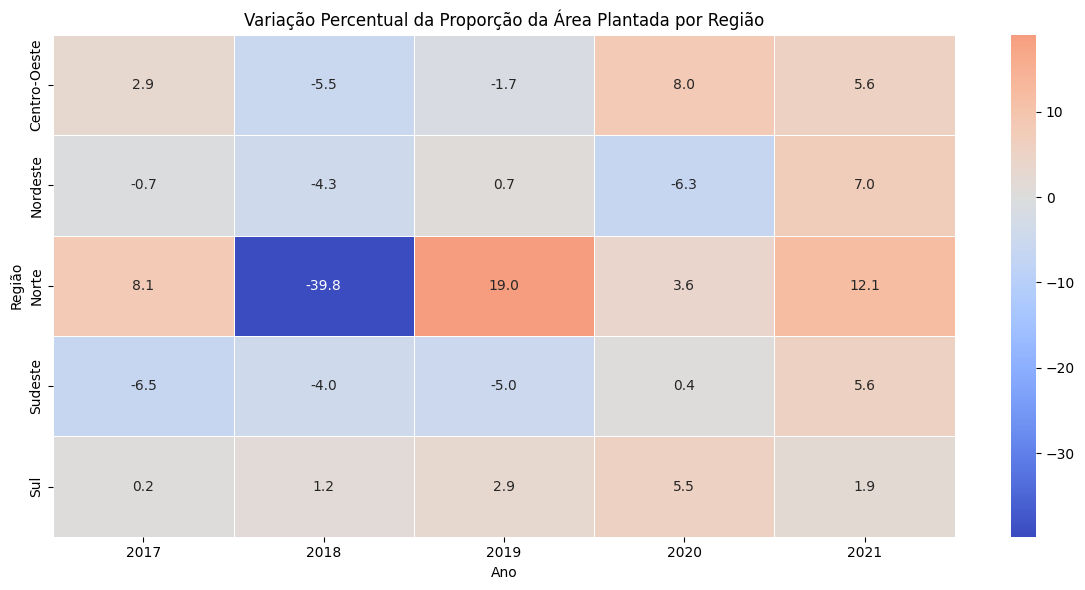

In [ ]:

dados['Ano'] = pd.to_numeric(dados['Ano'], errors='coerce')

# Agrupa por Região e Ano, e calcula a média da Proporção da Área Plantada de cada um desses grupos
grupo = dados.groupby(['Regiao', 'Ano'])['Proporcao_Area_Plantada'].mean().reset_index()

# Calcular a variação percentual da área plantada de um ano para o próximo
# A função pct_change() calcula a variação percentual entre o valor atual e o valor do ano anterior
grupo['Variação_Perc'] = grupo.groupby('Regiao')['Proporcao_Area_Plantada'].pct_change() * 100

# Criar uma tabela de variação percentual por região e ano
tabela = grupo.pivot_table(index='Regiao', columns='Ano', values='Variação_Perc', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(tabela, annot=True, cmap='coolwarm', fmt='.1f', center=0, linewidths=0.5)

plt.title('Variação Percentual da Proporção da Área Plantada por Região')
plt.xlabel('Ano')
plt.ylabel('Região')
plt.tight_layout()
plt.show()


### Conclusão:

A análise da variação percentual da proporção da área plantada entre 2017 e 2021 revela alterações significativas no uso da terra para a produção agrícola, possivelmente influenciadas por fatores políticos e econômicos. A partir de 2019, observa-se um aumento expressivo da área plantada em diversas regiões, especialmente no Norte e Centro-Oeste, o que coincide com a mudança de governo no Brasil. A nova gestão, iniciada em janeiro de 2019, implementou políticas mais favoráveis ao agronegócio, incluindo a flexibilização de normas ambientais. Essas medidas podem ter incentivado a expansão da agricultura, mesmo durante a pandemia de COVID-19, que, apesar das adversidades, não impediu o crescimento do setor. Assim, é possível inferir que as mudanças políticas, aliadas à resiliência do agronegócio frente à pandemia, desempenharam um papel relevante na dinâmica observada durante o período analisado.

# Estados com maior volume de atividades agropecuárias tendem a ter piores índices de perda e qualidade da água?

A intensa irrigação, o uso excessivo de pesticidas e fertilizantes, e o desmatamento para expansão agropecuária contribuem para a poluição da água e a degradação dos ecossistemas. O escoamento químico compromete a qualidade da água, afetando o consumo humano e a fauna local.

Assim, a relação entre agropecuária e qualidade da água em estados de alta produção é complexa. É essencial a colaboração entre produtores e políticas públicas para adotar práticas sustentáveis, como uso racional da água, controle da poluição e preservação de vegetação nativa, garantindo a produção sem comprometer recursos hídricos.

Diante disso, a questão é: estados com maior atividade agropecuária apresentam índices piores de perda e qualidade da água?

## Dados Sobre a qualidade da água

Para realizar as análises sobre perda e qualidade da água, foram utilizados dados do Sistema Nacional de Informações sobre Saneamento (SNIS), especificamente sobre "Água e Esgoto". A partir desses dados, foram selecionados os seguintes indicadores relacionados à qualidade da água em cada estado do Brasil:

* Índice de Conformidade da Quantidade de Amostra - Cloro Residual: Este índice avalia a conformidade da quantidade de cloro residual nas amostras de água coletadas. O cloro residual é um marcador de que a água foi adequadamente desinfetada, sendo seguro para consumo.

* Incidência das Análises de Cloro Residual Fora do Padrão: Refere-se à porcentagem de amostras de água em que a quantidade de cloro residual está fora dos limites estabelecidos pela legislação. Este indicador mostra a frequência com que os padrões de cloro residual não são atendidos.

* Índice de Conformidade da Quantidade de Amostra - Turbidez: Mede a conformidade da quantidade de turbidez nas amostras de água. A turbidez é causada pela presença de partículas suspensas como sedimentos, microrganismos e algas, que tornam a água visivelmente turva.

* Incidência das Análises de Turbidez Fora do Padrão: Indica a porcentagem de amostras de água em que a turbidez excede os limites permitidos pela legislação.

* Índice de Conformidade da Quantidade de Amostra - Coliformes Totais: Mede a conformidade das amostras de água quanto à presença de coliformes totais, que são indicadores de contaminação fecal. A presença de coliformes pode indicar risco de contaminação microbiológica da água.

* Incidência das Análises de Coliformes Totais Fora do Padrão: Refere-se à porcentagem de amostras em que a presença de coliformes totais ultrapassa os limites permitidos, indicando risco à saúde pública devido à possível contaminação fecal.

Esses indicadores são fornecidos anualmente e, com eles, foi construída uma tabela com os indicadores fora do padrão ("Incidência das análises totais fora do padrão"), sendo esses organizados por ano e UF.

In [ ]:
url1 = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/refs/heads/main/Datasets%20sobre%20%C3%81gua/Incid%C3%AAncia%20das%20an%C3%A1lises%20totais%20fora%20do%20padr%C3%A3o.csv"
dados_aguas = pd.read_csv(url1, sep=",")
dados_aguas.columns



Index(['Ano', 'UF', 'coliformes', ' turbidez', 'cloro'], dtype='object')

## Incidência das Análises de Coliformes Totais Fora do Padrão
O índice de coliformes fecais na água pode estar intimamente relacionado à atividade pecuária, especialmente em áreas com grande concentração de animais. A principal razão para isso é que os dejetos dos animais, como fezes e urina, podem contaminar fontes de água, caso não haja um manejo adequado desses resíduos. Quando as fezes de animais entram em contato com a água, elas liberam coliformes fecais, que são indicadores da presença de contaminação e potenciais riscos à saúde pública.

Foi criado um gráfico para analisar a relação entre produção pecuária média (barras azuis) e incidência de coliformes fora do padrão (linha vermelha) nos estados brasileiros (UFs).

*  Eixo X: estados brasileiros;

* Eixo Y esquerdo: produção pecuária média por estado;

* Eixo Y direito: incidência de coliformes fecais fora do padrão.

Na preparação dos dados, valores zero foram removidos para evitar distorções causadas por registros ausentes ou em branco, garantindo a integridade da análise.



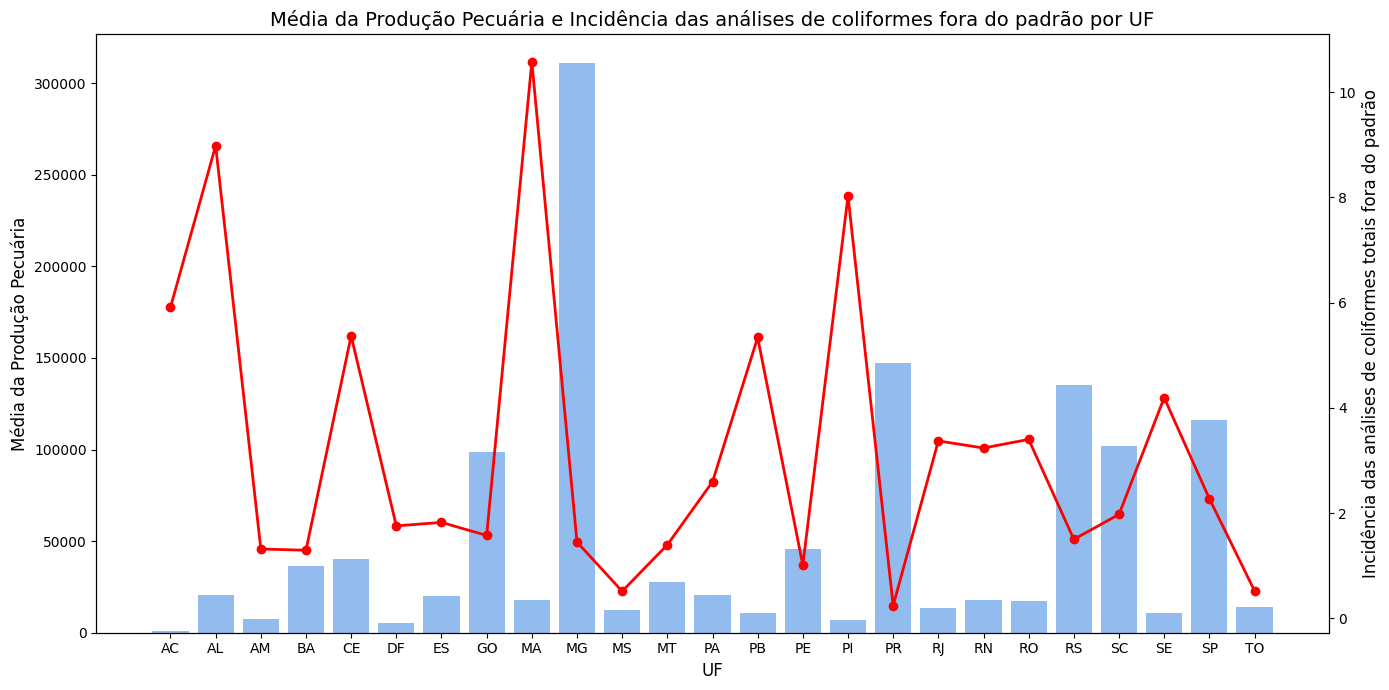

In [ ]:
# Agrupar por 'UF' e 'Ano' e somar a produção pecuária
dados_agrupados = dados.groupby(['Ano', 'UF'])['VlProducaoPecuaria'].sum().reset_index()

# Mesclar com os dados
dados_relacionados = pd.merge(dados_agrupados, dados_aguas, on=['UF', 'Ano'], how='inner')

# Substituir vírgulas por pontos para garantir a conversão correta
dados_relacionados['coliformes'] = dados_relacionados['coliformes'].astype(str).str.replace(',', '.')
dados_relacionados['coliformes'] = pd.to_numeric(dados_relacionados['coliformes'], errors='coerce')

# Remover estados que tenham qualquer valor 0 em 'VlProducaoPecuaria' ou 'Valor'
# Foi utilizado essa técnica de deixar apenas uma aparição do estado quando encontrasse o valor 0 para facilitar a retirada do mesmo, já que se um ano possuir um ruído afeta o resultado da média
estados_com_zero = dados_relacionados[(dados_relacionados['VlProducaoPecuaria'] == 0) | (dados_relacionados['coliformes'] == 0)]['UF'].unique()

dados_filtrados = dados_relacionados[~dados_relacionados['UF'].isin(estados_com_zero)]

# Calcular a média da produção pecuária e valor por 'UF'
dados_media = dados_filtrados.groupby('UF')[['VlProducaoPecuaria', 'coliformes']].mean().reset_index()


fig, ax1 = plt.subplots(figsize=(14, 7))
# Barras para a produção pecuária
ax1.bar(dados_media['UF'], dados_media['VlProducaoPecuaria'], color='#4A90E2', alpha=0.6, label='Produção Pecuária')
ax1.set_xlabel('UF', fontsize=12)
ax1.set_ylabel('Média da Produção Pecuária', fontsize=12)
# Criar o segundo eixo y para o gráfico de linha (para 'Valor')
ax2 = ax1.twinx()
ax2.plot(dados_media['UF'], dados_media['coliformes'], color='r', marker='o', label='Valor de Águas', linestyle='-', linewidth=2)
ax2.set_ylabel('Incidência das análises de coliformes totais fora do padrão', fontsize=12)

plt.title('Média da Produção Pecuária e Incidência das análises de coliformes fora do padrão por UF', fontsize=14)
plt.xticks(rotation=45)
fig.tight_layout()

plt.show()


### Conclusão:

Ao contrário do esperado, o gráfico não apresentou um padrão claro, indicando que, embora a pecuária possa ser um fator que influencia a qualidade da água, ela não teve grande impacto nos dados analisados. Esse resultado pode ser justificado por uma série de fatores, como a presença de saneamento básico, políticas públicas locais, diferenças no repasse de verbas, entre outros.

## Correlação entre Variáveis Agrícolas e de Qualidade da Água


Foi realizada uma análise de correlação para entender as relações entre variáveis da qualidade da água e atividades agropecuárias nos estados, usando um heatmap para visualização. As variáveis incluídas foram: coliformes, turbidez, cloro, área plantada e colhida, valor da produção agrícola e pecuária.

### Procedimentos:
* Integração dos Dados: Uniram-se as tabelas de qualidade da água e de produção agropecuária por estado (UF) e ano.

* Limpeza: Corrigidos formatos e removidos espaços e vírgulas; estados com valores zero em qualquer variável foram excluídos para evitar ruídos.

* Cálculo da Correlação: Usou-se a matriz de correlação para medir associações entre variáveis:

  * Valores próximos a 1 indicam forte correlação positiva.

  * Próximos a -1 indicam forte correlação negativa.

  * Próximos a 0 indicam ausência de correlação linear.

O heatmap permite investigar se estados com maior atividade agropecuária apresentam pior qualidade da água e maiores perdas.


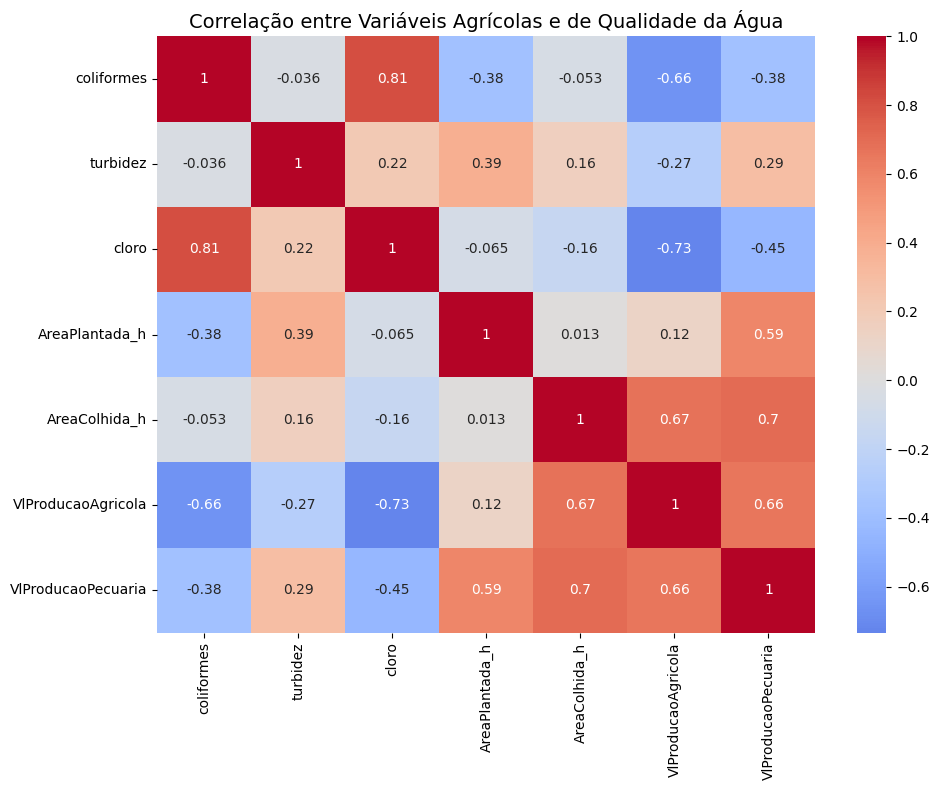

In [ ]:
# Merge das tabelas com base nas colunas 'UF' e 'Ano'
dados_relacionados = pd.merge(dados_aguas, dados, on=['UF', 'Ano'])

# Remover espaços extras nos nomes das colunas
dados_relacionados.columns = dados_relacionados.columns.str.strip()

# Garantir que as colunas numéricas estejam no formato correto (remover vírgulas e converter para float)
colunas_numericas = ['coliformes', 'turbidez', 'cloro', 'AreaPlantada_h', 'AreaColhida_h',
                     'VlProducaoAgricola', 'VlProducaoPecuaria']

for coluna in colunas_numericas:
    dados_relacionados[coluna] = dados_relacionados[coluna].replace({',': ''}, regex=True)  # Remover as vírgulas
    dados_relacionados[coluna] = pd.to_numeric(dados_relacionados[coluna], errors='coerce')  # Converter para número, ignorando erros

# Remover estados que tenham qualquer valor 0 em qualquer uma das colunas numéricas
estados_com_zero = dados_relacionados[(dados_relacionados[colunas_numericas] == 0).any(axis=1)]['UF'].unique()

dados_filtrados = dados_relacionados[~dados_relacionados['UF'].isin(estados_com_zero)]

# Correlação entre todas as variáveis numéricas
corr = dados_filtrados[colunas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre Variáveis Agrícolas e de Qualidade da Água', fontsize=14)
plt.tight_layout()
plt.show()

### Conclusão:

O gráfico forneceu uma visão geral da correlação entre as variáveis, com ênfase na relação entre a qualidade da água (indicadores como coliformes, turbidez e cloro) e a atividade agropecuária. A análise revelou uma correlação ligeiramente negativa entre as variáveis de qualidade da água e os indicadores de produção agropecuária, sugerindo que, em áreas com maior atividade agrícola, pode haver uma tendência de melhores práticas de manejo ambiental, o que poderia resultar em melhores parâmetros de qualidade da água. Essa correlação pode ser explicada por vários fatores, como o uso de tecnologias agrícolas mais modernas e sustentáveis, que promovem a conservação dos recursos hídricos e a redução da poluição.

Contudo, para confirmar essa hipótese e aprofundar a compreensão sobre a relação entre qualidade da água e atividade agropecuária, seria necessário ampliar a base de dados e realizar uma análise mais detalhada, incluindo variáveis adicionais relacionadas ao manejo de água. Dessa forma, será possível validar a existência de uma correlação consistente, bem como identificar possíveis causas.

Devido à dificuldade em obter dados consistentes e abrangentes sobre a qualidade da água, a análise passa a focar na relação entre desmatamento e atividades agropecuárias, buscando compreender como esses fatores se inter-relacionam no contexto ambiental e produtivo.
